In [49]:
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 23 00:40:58 2020

Introduction to tensor flow
- Installing Tensor flow
- Basic tensorflow programming
- Linear regression with tensor flow

LINK : https://colab.research.google.com/drive/1F_EWVKa8rbMXi3_fG0w7AtcscFq7Hi7B#forceEdit=true&sandboxMode=true
LINK : https://colab.research.google.com/drive/15Cyy2H7nT40sGR7TBN5wBvgTd57mVKay#forceEdit=true&sandboxMode=true
@author: MohammedS2
"""
#FOR LINER REGRESSION
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [50]:
"""ÏNSTALLING TENSORFLOW 2.0"""
"""
Create a different environment
$ conda create --name tensorflow2 python=3.7 anaconda
$ conda activate tensorflow2

Go to the cmd from navigator
$ python --version
$ python -m pip install --upgrade pip
$ pip install tensorflow
$ pip install --upgrade tensorflow==2.0.0-rc1 --user  or the latest version tensorflow==2.1.0-rc1 --user 

To verify the installation
$conda list
Check the tensorflow module's version
"""
import tensorflow as tf
print(tf.version)

<module 'tensorflow_core._api.v2.version' from 'C:\\Users\\mohammeds2\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\tensorflow_core\\_api\\v2\\version\\__init__.py'>


In [51]:
"""TENSOR AND SESSION"""
"""
Tensor is a partially defined computation vector, it can have one no dimenstion, one dimension, and more.

Session is to execute created sessions.
"""

#Create a Tensor  SCALAR TENSOR/ NO DIMENSION
string_variable = tf.Variable("Dummy string", tf.string)
int_variable = tf.Variable(123, tf.int64)
float_ariable = tf.Variable(1.234, tf.float64)
print(string_variable, int_variable, float_ariable)
#OUTPUT
# <tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'Dummy string'>
# <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=123>
# <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.234>

<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'Dummy string'> <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=123> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.234>


In [52]:
#RANK/DEGREE TENSOR
rank1_tensor = tf.Variable(["Dummy1"], tf.string)  #Rank 1, on 1d array 
rank2_tensor = tf.Variable([["First row", "Second column"], ["second row", "second column"], ["third row", "second column"]] ) #A matrix of 2x2
#print(rank1_tensor, rank2_tensor) 
#OUTPUT
# <tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'Dummy string'> <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=123> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.234>
# <tf.Variable 'Variable:0' shape=(2,) dtype=string, numpy=array([b'Dummy1', b'Dummy2'], dtype=object)> <tf.Variable 'Variable:0' shape=(2,) dtype=string, numpy=array([b'First row', b'Second column'], dtype=object)>

print(tf.rank(rank1_tensor))
tf.rank(rank2_tensor)
# tf.Tensor(1, shape=(), dtype=int32)
# tf.Tensor(1, shape=(), dtype=int32)

tf.Tensor(1, shape=(), dtype=int32)


<tf.Tensor: id=12390, shape=(), dtype=int32, numpy=2>

In [53]:
#Reshape Tensors
tensor1 = tf.ones([1, 2 ,3])
tensor2 = tf.reshape(tensor1, [3, -1])
print(tensor1)
print(tensor2)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


In [54]:
"""Eval a tensor
with tf.Session() as sess:
    tensor.eval()
"""

'Eval a tensor\nwith tf.Session() as sess:\n    tensor.eval()\n'

In [55]:
"""LINEAR REGRESSION"""
"""
Collecting data,
Seprating trainging set and test set
Analysing the data GRAPHS
Creating a FEATURE COLUMN out of dataset for linear reg
Explaining TRAINING PROCESS
Creating INPUT FUNCTION 
Creating MODEL
TRAINING, testing


(imports added in the beginning of file)
"""
#from __future__ import absolute_import, division, print_function, unicode_literals

#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt

#import tensorflow.compat.v2.feature_column as fc
#import tensorflow as tf

'\nCollecting data,\nSeprating trainging set and test set\nAnalysing the data GRAPHS\nCreating a FEATURE COLUMN out of dataserfor linear reg\nExplaining TRAINING PROCESS\nCreating INPUT FUNCTION \nCreating MODEL\nTRAINING, testing\n\n\n(imports added in the beginning of file)\n'

In [56]:
#Collecting Data
dftrain = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
dftest =pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv")
dftrain.head()
#

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [57]:
#Removing the target value
y_train = dftrain.pop("survived") #removes SURVIVED from dftrain and save the target column in y_train
y_test = dftest.pop("survived")
print(y_train)
dftrain.head()

0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64


,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [58]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [59]:
dftest.shape

(264, 9)

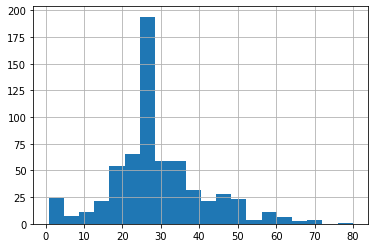

In [60]:
#Make graphs about the data
dftrain.age.hist(bins=20) #x-axis is the age range, y-axis is the number of people

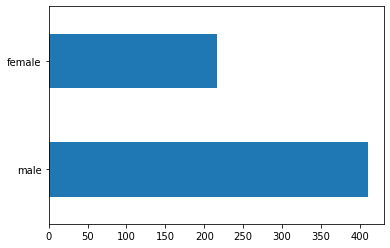

In [61]:
dftrain.sex.value_counts().plot(kind = "barh") # No.of males vs No.of females  dftr

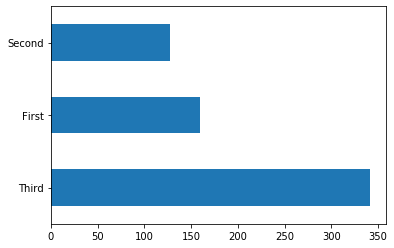

In [62]:
dftrain["class"].value_counts().plot(kind = "barh")

Text(0.5, 0, '% survived')

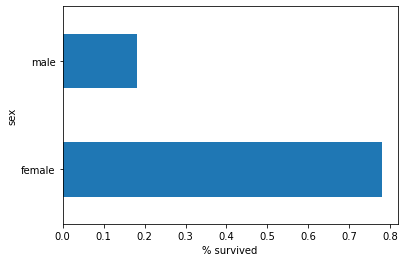

In [63]:
pd.concat([dftrain, y_train], axis = 1).groupby("sex").survived.mean().plot(kind = "barh").set_xlabel("% survived") #Finding % of males died and females died

In [64]:
#DATA Cleaning/ Creating FEATURE column
CATRGORICAL_COLUMNS = ["sex", "n_siblings_spouses", "parch", "class", "deck", "embark_town", "alone"] #To gather key and List of values for input
NUMERICAL_COLUMNS = ["age", "fare"] 

feature_columns = []

for feature in CATRGORICAL_COLUMNS:
    vocabulary = dftrain[feature].unique() #Gets a list of unique values from given feature column Eg: for "sex" [male, female]
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature, vocabulary)) #This will hold al the unique values for all columns
    
for feature in NUMERICAL_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature, dtype = tf.float32))
    
feature_columns

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.strin

In [65]:
#TRAINING PROCESS
#Breaking the input into batched, creating batches out of the input and providing it to the training model. We give 32 at once
#Creating EPOCHs, epoch is no.of times the model will see same data. We give the model same data again in different order.
#OVERFITTING sending the same data too many times, introducing BIAS for test dataset into the model.

#INPUT FUNCTION - TYPE 2
#Convert input pd.dataframe into tf.data.Dataset, because the Liner regression in tensorflow takes that type of input.
#This creates EPOCHs batches
def make_input_fun(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():                                                  #Inner function will be returned
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))   #Convert the dataset and target values from pd.df to required type
        if shuffle:
            ds = ds.shuffle(1000)                                          #Shuffle the rows in data.
        ds = ds.batch(batch_size).repeat(num_epochs)                       #Split data into batches of 32 and define the epochs/nu.of repeatations
        return ds                                                          #returns a batch of dataset
    return input_function                                                  #Returns the input function

In [66]:
#Use the function to convert trainset and test set
train_input_ds = make_input_fun(dftrain, y_train)
test_input_da = make_input_fun(dftest, y_test, num_epochs=1, shuffle=False)

In [67]:
#CREATING THE MODEL
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns) #Create object for Linear classifier, while providing the model what the inpust are gonna be 'FEATURE COLUMNS'

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\MOHAMM~2\\AppData\\Local\\Temp\\tmp805xn7t_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000026784C17080>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [68]:
#TRAINING THE MODEL
linear_est.train(train_input_ds) #Train... Pass the input function which has parameters passed for train ds
result = linear_est.evaluate(test_input_da) #test The trained model with the test ds

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\MOHAMM~2\AppData\Local\Temp\tmp805xn7t_\model.ckpt.
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 288.067
INFO:tensorflow:loss = 0.43974406, step = 100 (0.348 sec)
INFO:tensorflow:Saving

In [69]:
print(result["accuracy"]) #Got 74% accuracy
print(result)
#Improce accuray, play with epochs 

0.75757575
{'accuracy': 0.75757575, 'accuracy_baseline': 0.625, 'auc': 0.8382308, 'auc_precision_recall': 0.7935499, 'average_loss': 0.47201905, 'label/mean': 0.375, 'loss': 0.4638533, 'precision': 0.68421054, 'prediction/mean': 0.36480966, 'recall': 0.65656567, 'global_step': 200}


In [79]:
#PREDICTION
pred_result = list(linear_est.predict(test_input_da))  # to predict results, give a single datapoint or a dataframe, it should be converted using INPUT_FUNCTION
print(dftest.loc[100]) #We are checking results for this person
print(y_test.loc[100])
print(pred_result[100]["probabilities"][1]) #acces the data, answers by iterating through the list.

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\MOHAMM~2\AppData\Local\Temp\tmp805xn7t_\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                          male
age                            30
n_siblings_spouses              0
parch                           0
fare                         7.25
class                       Third
deck 